## The fifth In-class-exercise (9/30/2020, 20 points in total)

In exercise-03, I asked you to collected 500 textual data based on your own information needs (If you didn't collect the textual data, you should recollect for this exercise). Now we need to think about how to represent the textual data for text classification. In this exercise, you are required to select 10 types of features (10 types of features but absolutely more than 10 features) in the followings feature list, then represent the 500 texts with these features. The output should be in the following format:
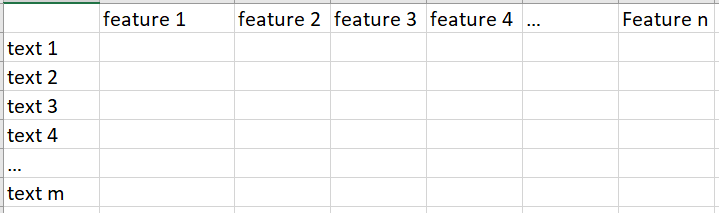

The feature list:

* (1) tf-idf features
* (2) POS-tag features: number of adjective, adverb, auxiliary, punctuation, complementizer, coordinating conjunction, subordinating conjunction, determiner, interjection, noun, possessor, preposition, pronoun, quantifier, verb, and other. (select some of them if you use pos-tag features)
* (3) Linguistic features:
  * number of right-branching nodes across all constituent types
  * number of right-branching nodes for NPs only
  * number of left-branching nodes across all constituent types
  * number of left-branching nodes for NPs only
  * number of premodifiers across all constituent types
  * number of premodifiers within NPs only
  * number of postmodifiers across all constituent types
  * number of postmodifiers within NPs only
  * branching index across all constituent types, i.e. the number of right-branching nodes minus number of left-branching nodes
  * branching index for NPs only
  * branching weight index: number of tokens covered by right-branching nodes minus number of tokens covered by left-branching nodes across all categories
  * branching weight index for NPs only 
  * modification index, i.e. the number of premodifiers minus the number of postmodifiers across all categories
  * modification index for NPs only
  * modification weight index: length in tokens of all premodifiers minus length in tokens of all postmodifiers across all categories
  * modification weight index for NPs only
  * coordination balance, i.e. the maximal length difference in coordinated constituents
  
  * density (density can be calculated using the ratio of folowing function words to content words) of determiners/quantifiers
  * density of pronouns
  * density of prepositions
  * density of punctuation marks, specifically commas and semicolons
  * density of auxiliary verbs
  * density of conjunctions
  * density of different pronoun types: Wh, 1st, 2nd, and 3rd person pronouns
  
  * maximal and average NP length
  * maximal and average AJP length
  * maximal and average PP length
  * maximal and average AVP length
  * sentence length

* Other features in your mind (ie., pre-defined patterns)

In [1]:
# Please write your code here

In [2]:
from collections import Counter
from spacy import displacy
import scrapy
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
import spacy
import nltk
# nltk.download('wordnet') # already downloaded
# load spaCy model
nlp = spacy.load("en_core_web_sm")
pd.set_option('max_colwidth', 60) # adjust column with of dataframe

# Import and Clean Data

In [3]:
df = pd.read_csv('reviews.csv', header=0, names=['rating', 'reviews']) # read the data (reviews) into a data frame
df.head()

,rating,reviews
0,1.0 out of 5 stars,"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n I purchased th..."
1,1.0 out of 5 stars,"['\n\n\n\n\n\n\n\n\n\n \n \n ', ""\n The item came ..."
2,1.0 out of 5 stars,"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n It has already..."
3,4.0 out of 5 stars,"['\n\n\n\n\n\n\n\n\n\n \n \n ', ""\n Came in evenin..."
4,2.0 out of 5 stars,"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n This laptop wa..."


In [4]:
# clean the comments
df['reviews_clean'] = df['reviews'].apply(lambda x: x.replace(r"'", ''))
df['reviews_clean'] = df['reviews_clean'].apply(lambda x: x.replace(r'"', ''))
df['reviews_clean'] = df['reviews_clean'].apply(
    lambda x: x.replace(r'[\n\n\n\n\n\n\n\n\n\n  \n  \n    , \n  ', ''))
df['reviews_clean'] = df['reviews_clean'].apply(
    lambda x: x.replace(r'\n, \n  \n]', ''))
df.head()

,rating,reviews,reviews_clean
0,1.0 out of 5 stars,"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n I purchased th...",I purchased this laptop with upgraded RAM (32GB) and SSD...
1,1.0 out of 5 stars,"['\n\n\n\n\n\n\n\n\n\n \n \n ', ""\n The item came ...",The item came promptly. From the beginning the touch scr...
2,1.0 out of 5 stars,"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n It has already...",It has already had issues that require repair beyond the...
3,4.0 out of 5 stars,"['\n\n\n\n\n\n\n\n\n\n \n \n ', ""\n Came in evenin...",Came in evening around 11pm so in thankful USPS was stil...
4,2.0 out of 5 stars,"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n This laptop wa...",This laptop was ok for the price. Lack of USB-C is a pro...


In [5]:
# quantify the ratings
df['rating'].replace(sorted(df['rating'].unique()), value=np.arange(1, 6), inplace=True)
df.head()

,rating,reviews,reviews_clean
0,1,"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n I purchased th...",I purchased this laptop with upgraded RAM (32GB) and SSD...
1,1,"['\n\n\n\n\n\n\n\n\n\n \n \n ', ""\n The item came ...",The item came promptly. From the beginning the touch scr...
2,1,"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n It has already...",It has already had issues that require repair beyond the...
3,4,"['\n\n\n\n\n\n\n\n\n\n \n \n ', ""\n Came in evenin...",Came in evening around 11pm so in thankful USPS was stil...
4,2,"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n This laptop wa...",This laptop was ok for the price. Lack of USB-C is a pro...


In [6]:
df_clean = df.drop('reviews', axis=1).copy()
df_clean.head()

,rating,reviews_clean
0,1,I purchased this laptop with upgraded RAM (32GB) and SSD...
1,1,The item came promptly. From the beginning the touch scr...
2,1,It has already had issues that require repair beyond the...
3,4,Came in evening around 11pm so in thankful USPS was stil...
4,2,This laptop was ok for the price. Lack of USB-C is a pro...


# Basic NLP Transformations

In [7]:
# Write your code here
# lowercase the comments
df_clean['reviews_clean'] = df_clean['reviews_clean'].apply(
    lambda x: ' '.join([x.lower() for x in x.split()]))
df_clean.head()

,rating,reviews_clean
0,1,i purchased this laptop with upgraded ram (32gb) and ssd...
1,1,the item came promptly. from the beginning the touch scr...
2,1,it has already had issues that require repair beyond the...
3,4,came in evening around 11pm so in thankful usps was stil...
4,2,this laptop was ok for the price. lack of usb-c is a pro...


In [8]:
# remove punctuations
df_clean['reviews_clean'] = df_clean['reviews_clean'].str.replace('[^\w\s]', '')
df_clean.head()

,rating,reviews_clean
0,1,i purchased this laptop with upgraded ram 32gb and ssd 1...
1,1,the item came promptly from the beginning the touch scre...
2,1,it has already had issues that require repair beyond the...
3,4,came in evening around 11pm so in thankful usps was stil...
4,2,this laptop was ok for the price lack of usbc is a probl...


In [9]:
# remove numbers
numbers = '0123456789'
df_clean['reviews_clean'] = df_clean['reviews_clean'].apply(
    lambda x: ''.join(x for x in list(x) if x not in numbers))
df_clean.head()

,rating,reviews_clean
0,1,i purchased this laptop with upgraded ram gb and ssd tb ...
1,1,the item came promptly from the beginning the touch scre...
2,1,it has already had issues that require repair beyond the...
3,4,came in evening around pm so in thankful usps was still ...
4,2,this laptop was ok for the price lack of usbc is a probl...


In [10]:
# remove stopwords
stop = stopwords.words('english')
df_clean['reviews_clean'] = df_clean['reviews_clean'].apply(
    lambda x: ' '.join(x for x in x.split() if x not in stop))
df_clean.head()

,rating,reviews_clean
0,1,purchased laptop upgraded ram gb ssd tb arrived near may...
1,1,item came promptly beginning touch screen didnt work cou...
2,1,already issues require repair beyond inhouse guy
3,4,came evening around pm thankful usps still working scrat...
4,2,laptop ok price lack usbc problem especially power conne...


In [11]:
# stemming
st = PorterStemmer()
df_clean['reviews_clean'] = df_clean['reviews_clean'].apply(
    lambda x: " ".join([st.stem(word) for word in x.split()]))
df_clean.head()

,rating,reviews_clean
0,1,purchas laptop upgrad ram gb ssd tb arriv near may fan d...
1,1,item came promptli begin touch screen didnt work could l...
2,1,alreadi issu requir repair beyond inhous guy
3,4,came even around pm thank usp still work scratch outsid ...
4,2,laptop ok price lack usbc problem especi power connector...


In [12]:
# spelling correction
from textblob import TextBlob
df_clean['reviews_clean'] = df_clean['reviews_clean'].apply(lambda x: str(TextBlob(x).correct()))
df_clean.head()

,rating,reviews_clean
0,1,purchase lawton upgrade ram go sad to arrive near may fa...
1,1,item came promptly begin touch screen didn work could li...
2,1,already issue require repair beyond nous guy
3,4,came even around pm thank up still work scratch outside ...
4,2,lawton ok price lack us problem respect power connection...


In [13]:
# lemmatization
df['reviews_clean'] = df['reviews_clean'].apply(
    lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_clean.head()

,rating,reviews_clean
0,1,purchase lawton upgrade ram go sad to arrive near may fa...
1,1,item came promptly begin touch screen didn work could li...
2,1,already issue require repair beyond nous guy
3,4,came even around pm thank up still work scratch outside ...
4,2,lawton ok price lack us problem respect power connection...


# Tf- Idf Features

In [14]:
def term_frequency(string):
    from collections import Counter
    tf = {}
    counts = Counter(string.split())
    for key, value in counts.items():
        tf[key] = round((value/len(counts.keys())), 3)
    return tf

In [15]:
df_clean['reviews_clean'].apply(term_frequency)

0      {'purchase': 0.053, 'lawton': 0.07, 'upgrade': 0.018, 'r...
1      {'item': 0.034, 'came': 0.034, 'promptly': 0.034, 'begin...
2      {'already': 0.143, 'issue': 0.143, 'require': 0.143, 're...
3      {'came': 0.048, 'even': 0.024, 'around': 0.024, 'pm': 0....
4      {'lawton': 0.048, 'ok': 0.048, 'price': 0.048, 'lack': 0...
                                  ...                             
105                                 {'happy': 0.5, 'product': 0.5}
106                                   {'best': 0.5, 'lawton': 0.5}
107    {'do': 0.029, 'adapt': 0.029, 'plain': 0.029, 'tight': 0...
108    {'second': 0.028, 'well': 0.056, 'lawton': 0.056, 'first...
109    {'overall': 0.028, 'lawton': 0.028, 'ok': 0.028, 'dont':...
Name: reviews_clean, Length: 110, dtype: object

In [16]:
df_clean['tf'] = df_clean['reviews_clean'].apply(term_frequency)

In [17]:
def inverse_document_fequency(array):
    from math import log
    word_counts_by_row = []
    for row in array:
        d = dict.fromkeys(row.split(' '), 0)
        word_counts_by_row.append(d)
    for d in word_counts_by_row:
        for word in d.keys():
            for row in array:
                if word in row.split(' '):
                    v = d[word]
                    v += 1
                    d[word] = v
    for d in word_counts_by_row:
        for key, value in d.items():
            d[key] = log(array.shape[0]/value)
    return word_counts_by_row

In [18]:
df_clean['idf'] = inverse_document_fequency(df_clean['reviews_clean'].values)
df_clean['idf']

0      {'purchase': 2.5032557884561966, 'lawton': 0.80866006768...
1      {'item': 3.091042453358316, 'came': 2.5032557884561966, ...
2      {'already': 3.6018680771243066, 'issue': 2.3025850929940...
3      {'came': 2.5032557884561966, 'even': 2.3978952727983707,...
4      {'lawton': 0.8086600676817896, 'ok': 3.6018680771243066,...
                                  ...                             
105    {'happy': 2.5032557884561966, 'product': 2.0614230361771...
106     {'best': 2.7545702167371027, 'lawton': 0.8086600676817896}
107    {'do': 4.700480365792417, 'adapt': 3.6018680771243066, '...
108    {'second': 3.3141860046725258, 'well': 1.333184535805942...
109    {'overall': 3.3141860046725258, 'lawton': 0.808660067681...
Name: idf, Length: 110, dtype: object

In [19]:
def tf_idf(array1, array2):
    tf_idf_by_row = []
    for d1, d2 in zip(array1, array2):
        d = {}
        for key in d1.keys():
            d[key] = d1[key]*d2[key]
        tf_idf_by_row.append(d)
    return tf_idf_by_row

In [20]:
df_clean['tf_idf'] = tf_idf(df_clean['tf'].values, df_clean['idf'].values)
df_clean['tf_idf']

0      {'purchase': 0.1326725567881784, 'lawton': 0.05660620473...
1      {'item': 0.10509544341418275, 'came': 0.0851106968075106...
2      {'already': 0.5150671350287758, 'issue': 0.3292696682981...
3      {'came': 0.12015627784589744, 'even': 0.0575494865471609...
4      {'lawton': 0.0388156832487259, 'ok': 0.17288966770196673...
                                  ...                             
105    {'happy': 1.2516278942280983, 'product': 1.0307115180885...
106     {'best': 1.3772851083685513, 'lawton': 0.4043300338408948}
107    {'do': 0.13631393060798008, 'adapt': 0.1044541742366049,...
108    {'second': 0.09279720813083073, 'well': 0.07465833400513...
109    {'overall': 0.09279720813083073, 'lawton': 0.02264248189...
Name: tf_idf, Length: 110, dtype: object

# POS-tag Features

In [21]:
def tag_counts(review):
    tokens = nlp(review)
    pos = [token.pos_ for token in tokens]
    counts = Counter(pos)
    return counts

In [22]:
df_clean['tags'] = df_clean['reviews_clean'].apply(tag_counts)
df_clean['tags']

0      {'PROPN': 13, 'VERB': 16, 'ADJ': 9, 'PART': 1, 'SCONJ': ...
1      {'NOUN': 13, 'VERB': 10, 'ADV': 2, 'PROPN': 2, 'PART': 1...
2             {'ADV': 1, 'NOUN': 3, 'VERB': 1, 'ADP': 1, 'ADJ': 1}
3      {'VERB': 11, 'ADV': 6, 'ADP': 5, 'NOUN': 18, 'ADJ': 8, '...
4      {'PROPN': 2, 'INTJ': 1, 'NOUN': 9, 'VERB': 3, 'PRON': 2,...
                                  ...                             
105                                          {'ADJ': 1, 'NOUN': 1}
106                                         {'ADJ': 1, 'PROPN': 1}
107    {'AUX': 2, 'VERB': 7, 'ADJ': 11, 'PROPN': 3, 'NOUN': 12,...
108    {'ADJ': 9, 'PROPN': 3, 'ADV': 3, 'NUM': 2, 'NOUN': 16, '...
109    {'ADJ': 6, 'PROPN': 10, 'AUX': 1, 'PART': 1, 'VERB': 8, ...
Name: tags, Length: 110, dtype: object

# Linguistic features

1. sentence length
2. density of pronouns
3. density of prepositions
4. density of punctuation marks, specifically commas and semicolons
5. density of auxiliary verbs
6. density of conjunctions
7. maximal and average NP length
8. maximal and average AJP length
9. maximal and average PP length
10. maximal and average AVP length

## Sentence Length

In [23]:
def sentence_length(row):
    return len(row.split(' '))

In [24]:
df_clean['sentence_length'] = df_clean['reviews_clean'].apply(sentence_length)

## Density of Pronouns

In [25]:
def density_pronoun(row):
    return row['PRON'] + row['DET']

In [26]:
df_clean['tags'].apply(density_pronoun) / df_clean['sentence_length']

0      0.026316
1      0.000000
2      0.000000
3      0.000000
4      0.095238
         ...   
105    0.000000
106    0.000000
107    0.000000
108    0.000000
109    0.000000
Length: 110, dtype: float64

In [27]:
df_clean['density_pronoun'] = df_clean['tags'].apply(density_pronoun) / df_clean['sentence_length']

## Density of Prepositions

In [28]:
def density_preposition(row):
    return row['ADP']

In [29]:
df_clean['tags'].apply(density_preposition) / df_clean['sentence_length']

0      0.013158
1      0.000000
2      0.142857
3      0.098039
4      0.000000
         ...   
105    0.000000
106    0.000000
107    0.024390
108    0.047619
109    0.000000
Length: 110, dtype: float64

In [30]:
df_clean['density_pronoun'] = df_clean['tags'].apply(density_preposition) / df_clean['sentence_length']

## Density of Punctuations

In [31]:
def density_punct(row):
    return row['PUNCT']

In [32]:
# will return 0 since all punctuations are removed in the preprocessing
df_clean['density_punct'] = df_clean['tags'].apply(density_punct) / df_clean['sentence_length']

## Density of Auxiliary Verbs

In [33]:
def density_aux(row):
    return row['VERB']

In [34]:
df_clean['tags'].apply(density_aux) / df_clean['sentence_length']

0      0.210526
1      0.344828
2      0.142857
3      0.215686
4      0.142857
         ...   
105    0.000000
106    0.000000
107    0.170732
108    0.095238
109    0.200000
Length: 110, dtype: float64

In [35]:
df_clean['density_aux'] = df_clean['tags'].apply(density_aux) / df_clean['sentence_length']

## Density of Conjuctions

In [36]:
def density_conj(row):
    return row['CCONJ']

In [37]:
df_clean['tags'].apply(density_conj) / df_clean['sentence_length']

0      0.026316
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
105    0.000000
106    0.000000
107    0.000000
108    0.000000
109    0.000000
Length: 110, dtype: float64

In [38]:
df_clean['density_conj'] = df_clean['tags'].apply(density_conj) / df_clean['sentence_length']

## Max & Average NP

In [39]:
def noun_phrase(row):
    d = {}
    chunks = []
    doc = nlp(row)
    for chunk in doc.noun_chunks:
        chunks.append(chunk.text)
    
    length = 0
    total = 0
    for phrase in chunks:
        total += len(phrase)
        if len(phrase) >= length:
            length = len(phrase)
            d['max'] = length
    if len(chunks) == 0:
        d['avg'] = 0
    else:
        d['avg'] = total/len(chunks)
    return d

In [40]:
df_clean['reviews_clean'].apply(noun_phrase)

0                  {'max': 37, 'avg': 14.125}
1      {'max': 22, 'avg': 12.857142857142858}
2        {'max': 8, 'avg': 6.333333333333333}
3      {'max': 40, 'avg': 15.727272727272727}
4                    {'max': 35, 'avg': 20.0}
                        ...                  
105                  {'max': 13, 'avg': 13.0}
106                  {'max': 11, 'avg': 11.0}
107                 {'max': 29, 'avg': 18.25}
108                  {'max': 30, 'avg': 13.1}
109    {'max': 21, 'avg': 14.833333333333334}
Name: reviews_clean, Length: 110, dtype: object

In [41]:
df_clean['max_avg_np'] = df_clean['reviews_clean'].apply(noun_phrase)